In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
from ultralytics import YOLO

In [2]:
%matplotlib inline

In [3]:
model_11 = YOLO("yolo11n.pt")
model_12 = YOLO("yolo12n.pt")

In [4]:
from glob import glob

In [5]:
from pathlib import Path
current_dir = Path().resolve()
path = current_dir / 'data'

In [6]:
annotations = glob(f"{path}/annotations/*.xml")

In [7]:
labels = dict(
    img_path=[],
    xmin=[],
    xmax=[],
    ymin=[],
    ymax=[],
    img_w=[],
    img_h=[]
)

In [8]:
import xml.etree.ElementTree as xet

In [9]:
for file in annotations:
  info = xet.parse(file)
  root = info.getroot()

  obj = root.find('object')
  labels_info = obj.find("bndbox")
  xmin = int(labels_info.find("xmin").text)
  xmax = int(labels_info.find("xmax").text)
  ymin = int(labels_info.find("ymin").text)
  ymax = int(labels_info.find("ymax").text)

  img = root.find("filename").text
  img_path = os.path.join(path, "images", img)

  labels['img_path'].append(img_path)
  labels['xmin'].append(xmin)
  labels['xmax'].append(xmax)
  labels['ymin'].append(ymin)
  labels['ymax'].append(ymax)

  h, w, _ = cv2.imread(img_path).shape
  labels['img_w'].append(w)
  labels['img_h'].append(h)

In [10]:
df = pd.DataFrame(labels)

In [11]:
df.head(10)

,img_path,xmin,xmax,ymin,ymax,img_w,img_h
0,C:\Users\nolan\cse574proj\data\images\Cars0.png,226,419,125,173,500,268
1,C:\Users\nolan\cse574proj\data\images\Cars1.png,134,262,128,160,400,248
2,C:\Users\nolan\cse574proj\data\images\Cars10.png,140,303,5,148,400,225
3,C:\Users\nolan\cse574proj\data\images\Cars100.png,175,214,114,131,400,267
4,C:\Users\nolan\cse574proj\data\images\Cars101.png,167,240,202,220,400,300
5,C:\Users\nolan\cse574proj\data\images\Cars102.png,66,322,147,199,350,263
6,C:\Users\nolan\cse574proj\data\images\Cars103.png,230,248,129,134,400,196
7,C:\Users\nolan\cse574proj\data\images\Cars104.png,195,244,266,282,500,374
8,C:\Users\nolan\cse574proj\data\images\Cars105.png,152,206,147,159,400,240
9,C:\Users\nolan\cse574proj\data\images\Cars106.png,138,177,79,92,400,247


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
 train, test = train_test_split(df, test_size=1/10, random_state=13)

 train, val = train_test_split(train, train_size=8/9, random_state=13)

 print(f'''
       len(train): {len(train)}
       len(val): {len(val)}
       len(test): {len(test)}
       ''')


      len(train): 345
      len(val): 44
      len(test): 44
      


In [14]:
train.head(10)

,img_path,xmin,xmax,ymin,ymax,img_w,img_h
190,C:\Users\nolan\cse574proj\data\images\Cars27.png,148,245,127,159,400,225
193,C:\Users\nolan\cse574proj\data\images\Cars272.png,170,316,81,121,558,229
55,C:\Users\nolan\cse574proj\data\images\Cars148.png,135,218,134,158,400,225
111,C:\Users\nolan\cse574proj\data\images\Cars199.png,59,310,88,158,400,266
103,C:\Users\nolan\cse574proj\data\images\Cars191.png,96,199,189,217,400,246
332,C:\Users\nolan\cse574proj\data\images\Cars398.png,72,196,139,222,400,300
191,C:\Users\nolan\cse574proj\data\images\Cars270.png,75,125,173,195,400,225
284,C:\Users\nolan\cse574proj\data\images\Cars354.png,65,102,202,222,400,267
430,C:\Users\nolan\cse574proj\data\images\Cars97.png,98,297,102,191,400,300
303,C:\Users\nolan\cse574proj\data\images\Cars371.png,313,371,135,150,400,190


In [15]:
val.head()

,img_path,xmin,xmax,ymin,ymax,img_w,img_h
280,C:\Users\nolan\cse574proj\data\images\Cars350.png,162,211,179,188,400,268
408,C:\Users\nolan\cse574proj\data\images\Cars77.png,229,309,151,178,400,270
80,C:\Users\nolan\cse574proj\data\images\Cars170.png,318,346,190,224,500,365
259,C:\Users\nolan\cse574proj\data\images\Cars331.png,164,235,220,240,560,420
96,C:\Users\nolan\cse574proj\data\images\Cars185.png,154,293,147,194,400,267


In [16]:
test.head()

,img_path,xmin,xmax,ymin,ymax,img_w,img_h
423,C:\Users\nolan\cse574proj\data\images\Cars90.png,77,101,204,225,400,300
234,C:\Users\nolan\cse574proj\data\images\Cars309.png,152,252,122,207,400,225
165,C:\Users\nolan\cse574proj\data\images\Cars247.png,147,300,11,149,400,225
29,C:\Users\nolan\cse574proj\data\images\Cars124.png,305,320,256,267,400,267
388,C:\Users\nolan\cse574proj\data\images\Cars59.png,324,375,162,175,400,300


In [17]:
import shutil

In [18]:
def split_yolo_format(split_name, split_df):
    # Set base directory relative to current file/notebook
    base_dir = Path().resolve() / 'datasets' / 'car_license_plates' / split_name

    annotations_path = base_dir / 'labels'
    images_path = base_dir / 'images'

    # Create directories
    annotations_path.mkdir(parents=True, exist_ok=True)
    images_path.mkdir(parents=True, exist_ok=True)

    for _, row in split_df.iterrows():
        img_path = Path(row['img_path'])
        img_name = img_path.stem
        img_extension = img_path.suffix

        # Normalize bounding box to YOLO format
        x_center = (row['xmin'] + row['xmax']) / 2 / row['img_w']
        y_center = (row['ymin'] + row['ymax']) / 2 / row['img_h']
        width = (row['xmax'] - row['xmin']) / row['img_w']
        height = (row['ymax'] - row['ymin']) / row['img_h']

        # Write YOLO annotation
        annotation_file = annotations_path / f'{img_name}.txt'
        with open(annotation_file, 'w') as f:
            f.write(f"0 {x_center:.4f} {y_center:.4f} {width:.4f} {height:.4f}\n")

        # Copy image to images folder
        shutil.copy(img_path, images_path / (img_name + img_extension))

    print(f"Created:\n- Images: {images_path}\n- Labels: {annotations_path}")


In [19]:
split_yolo_format("train", train)
split_yolo_format("val", val)
split_yolo_format("test", test)

Created:
- Images: C:\Users\nolan\cse574proj\datasets\car_license_plates\train\images
- Labels: C:\Users\nolan\cse574proj\datasets\car_license_plates\train\labels
Created:
- Images: C:\Users\nolan\cse574proj\datasets\car_license_plates\val\images
- Labels: C:\Users\nolan\cse574proj\datasets\car_license_plates\val\labels
Created:
- Images: C:\Users\nolan\cse574proj\datasets\car_license_plates\test\images
- Labels: C:\Users\nolan\cse574proj\datasets\car_license_plates\test\labels


In [20]:
yolo_yaml = '''
path: car_license_plates

train: train/images
val: val/images
test: test/images

# number of classes
nc: 1

# class names
names: ['license_plate']
'''

with open('datasets.yaml', 'w') as file:
  file.write(yolo_yaml)

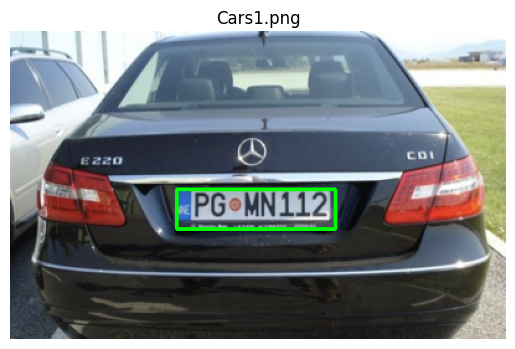

In [21]:
import cv2
import os
from pathlib import Path
import matplotlib.pyplot as plt

# Set paths relative to notebook location
base_dir = Path().resolve() / 'datasets' / 'car_license_plates' / 'train'
image_dir = base_dir / 'images'
label_dir = base_dir / 'labels'

# Get first image file
image_files = sorted(os.listdir(image_dir))
first_image_file = image_files[0]

# Full image and label paths
image_path = image_dir / first_image_file
label_path = label_dir / (Path(first_image_file).stem + ".txt")

# Read and prepare the image
image = cv2.imread(str(image_path))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Read YOLO label
with open(label_path, 'r') as file:
    lines = file.readlines()

# Draw bounding boxes
for line in lines:
    class_id, x_center, y_center, width, height = map(float, line.strip().split())
    img_height, img_width, _ = image.shape

    x_center *= img_width
    y_center *= img_height
    width *= img_width
    height *= img_height

    x1 = int(x_center - width / 2)
    y1 = int(y_center - height / 2)
    x2 = int(x_center + width / 2)
    y2 = int(y_center + height / 2)

    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Show image with bounding box
plt.imshow(image)
plt.axis('off')
plt.title(first_image_file)
plt.show()


In [22]:
import time
import warnings
warnings.filterwarnings('ignore')

In [23]:
import torch

print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.version.cuda)

True
1
11.8


In [24]:
t1 = time.time()
model_12.train(
    data='datasets.yaml',
    epochs=100,
    device='cuda',
    imgsz=320,
    cache=True
)
t2 = time.time()
print(f"Training time: {t2-t1}")

Ultralytics 8.3.116  Python-3.13.3 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)
engine\trainer: task=detect, mode=train, model=yolo12n.pt, data=datasets.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=320, save=True, save_period=-1, cache=True, device=cuda, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width

train: Scanning C:\Users\nolan\cse574proj\datasets\car_license_plates\train\labels.cache... 345 images, 0 backgrounds, 0 corrupt: 100%|██████████| 345/345 [00:00<?, ?it/s]


WARNING cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.1GB RAM): 100%|██████████| 345/345 [00:00<00:00, 754.00it/s]


val: Fast image access  (ping: 0.00.0 ms, read: 1809.3720.1 MB/s, size: 492.8 KB)


val: Scanning C:\Users\nolan\cse574proj\datasets\car_license_plates\val\labels.cache... 44 images, 0 backgrounds, 0 corrupt: 100%|██████████| 44/44 [00:00<?, ?it/s]


WARNING cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.0GB RAM): 100%|██████████| 44/44 [00:00<00:00, 735.88it/s]


Plotting labels to runs\detect\train9\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 8 dataloader workers
Logging results to runs\detect\train9
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      0.74G      1.776      2.999      1.328         13        320: 100%|██████████| 22/22 [00:05<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]

                   all         44         44    0.00408      0.977      0.223     0.0698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100     0.811G      1.557        1.6      1.152         14        320: 100%|██████████| 22/22 [00:03<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.30it/s]

                   all         44         44    0.00377      0.977      0.057     0.0207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100     0.811G      1.577      1.463      1.196         12        320: 100%|██████████| 22/22 [00:03<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.75it/s]

                   all         44         44    0.00333      0.932     0.0139    0.00567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100     0.826G      1.625      1.418      1.259         19        320: 100%|██████████| 22/22 [00:03<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.05it/s]

                   all         44         44     0.0916      0.205      0.068     0.0251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100     0.826G      1.556      1.303      1.242         10        320: 100%|██████████| 22/22 [00:03<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.33it/s]

                   all         44         44     0.0146      0.432     0.0129    0.00562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100     0.826G      1.565      1.319      1.203         10        320: 100%|██████████| 22/22 [00:02<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.72it/s]

                   all         44         44    0.00541      0.477    0.00394    0.00194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100     0.826G      1.476      1.203      1.189         21        320: 100%|██████████| 22/22 [00:03<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.70it/s]

                   all         44         44      0.639      0.362      0.404      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100     0.826G      1.524      1.162      1.194         20        320: 100%|██████████| 22/22 [00:03<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.05it/s]

                   all         44         44      0.817      0.591      0.727      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100     0.826G      1.507      1.154      1.215         11        320: 100%|██████████| 22/22 [00:02<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.01it/s]

                   all         44         44      0.809      0.636      0.755      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100     0.832G      1.471      1.078      1.185         17        320: 100%|██████████| 22/22 [00:03<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.00it/s]

                   all         44         44      0.756      0.818      0.811      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100     0.832G      1.434      1.038      1.162         18        320: 100%|██████████| 22/22 [00:03<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.83it/s]

                   all         44         44      0.767      0.747      0.795      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100     0.832G      1.401      1.008      1.118         13        320: 100%|██████████| 22/22 [00:02<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.41it/s]

                   all         44         44      0.809      0.773      0.795      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100     0.832G      1.433      1.021      1.183         19        320: 100%|██████████| 22/22 [00:03<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.11it/s]

                   all         44         44      0.759       0.75      0.789       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100     0.832G      1.329      0.958      1.121         24        320: 100%|██████████| 22/22 [00:03<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.29it/s]

                   all         44         44      0.818      0.816      0.856      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100     0.846G      1.343      0.969      1.134         15        320: 100%|██████████| 22/22 [00:02<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.01it/s]

                   all         44         44      0.925      0.795      0.894      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100     0.846G      1.446     0.9584      1.166         13        320: 100%|██████████| 22/22 [00:03<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.74it/s]

                   all         44         44       0.88      0.795       0.86      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100     0.846G      1.365     0.9624       1.14         15        320: 100%|██████████| 22/22 [00:02<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.22it/s]

                   all         44         44      0.842      0.849      0.888      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100     0.846G      1.353     0.9176       1.15         17        320: 100%|██████████| 22/22 [00:02<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.73it/s]

                   all         44         44      0.852      0.773      0.849      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100     0.846G      1.303     0.8597      1.107         23        320: 100%|██████████| 22/22 [00:02<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.56it/s]

                   all         44         44      0.848      0.841      0.863      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100     0.846G       1.32     0.8774      1.136         20        320: 100%|██████████| 22/22 [00:02<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.46it/s]

                   all         44         44      0.863      0.773      0.821      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100     0.846G      1.246      0.844      1.091         18        320: 100%|██████████| 22/22 [00:02<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.19it/s]

                   all         44         44      0.933      0.773      0.892       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100     0.846G      1.243     0.8395      1.091         12        320: 100%|██████████| 22/22 [00:02<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.84it/s]

                   all         44         44      0.774      0.795      0.822      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100     0.846G      1.295      0.827      1.097         22        320: 100%|██████████| 22/22 [00:02<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.58it/s]

                   all         44         44      0.809      0.909       0.93      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100     0.846G      1.299     0.8006      1.122         19        320: 100%|██████████| 22/22 [00:02<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.47it/s]

                   all         44         44      0.805      0.864       0.84      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100     0.846G      1.271     0.8019      1.087         15        320: 100%|██████████| 22/22 [00:02<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.53it/s]

                   all         44         44      0.768      0.795      0.818      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100     0.846G      1.218     0.7919      1.072         20        320: 100%|██████████| 22/22 [00:03<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.04it/s]

                   all         44         44      0.856      0.818      0.876      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100     0.846G      1.293     0.7799      1.103         17        320: 100%|██████████| 22/22 [00:02<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.30it/s]

                   all         44         44      0.856      0.814       0.83      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100     0.846G      1.267      0.805      1.098         16        320: 100%|██████████| 22/22 [00:02<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.91it/s]

                   all         44         44      0.934      0.841      0.892      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100     0.861G      1.224     0.7949      1.075         17        320: 100%|██████████| 22/22 [00:02<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.76it/s]

                   all         44         44      0.939      0.909      0.937      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100     0.861G       1.21       0.78      1.086         11        320: 100%|██████████| 22/22 [00:02<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.48it/s]

                   all         44         44      0.973      0.831      0.903      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100     0.861G      1.269     0.7801      1.084         14        320: 100%|██████████| 22/22 [00:02<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.52it/s]

                   all         44         44      0.873      0.779      0.862      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100     0.861G       1.18       0.75      1.056         19        320: 100%|██████████| 22/22 [00:03<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.89it/s]

                   all         44         44      0.903      0.843       0.88      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100     0.861G      1.152     0.7177      1.025         17        320: 100%|██████████| 22/22 [00:02<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.36it/s]

                   all         44         44      0.857      0.886      0.883      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100     0.861G      1.179     0.7537       1.05         14        320: 100%|██████████| 22/22 [00:02<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.79it/s]

                   all         44         44      0.782      0.897      0.886      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100     0.861G       1.24     0.7505      1.073         13        320: 100%|██████████| 22/22 [00:02<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.97it/s]

                   all         44         44      0.849      0.886      0.904      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100     0.861G      1.175     0.7117      1.045         16        320: 100%|██████████| 22/22 [00:02<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.31it/s]

                   all         44         44      0.929      0.795      0.866      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100     0.861G       1.08      0.693       1.02         16        320: 100%|██████████| 22/22 [00:02<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.04it/s]

                   all         44         44      0.868      0.932      0.928      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100     0.861G      1.161     0.6967      1.053         20        320: 100%|██████████| 22/22 [00:03<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.76it/s]

                   all         44         44        0.9      0.932      0.943      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100     0.861G      1.133     0.7063      1.038         21        320: 100%|██████████| 22/22 [00:02<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.31it/s]

                   all         44         44      0.903      0.886      0.936      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100     0.861G      1.162     0.7015       1.05         16        320: 100%|██████████| 22/22 [00:02<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.86it/s]

                   all         44         44       0.94      0.818      0.909      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100     0.861G       1.14     0.6874      1.036         22        320: 100%|██████████| 22/22 [00:02<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.14it/s]

                   all         44         44      0.868      0.894      0.913      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100     0.861G      1.127     0.6759      1.021         17        320: 100%|██████████| 22/22 [00:02<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.01it/s]

                   all         44         44      0.941      0.886      0.922      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100     0.861G      1.092     0.6422      1.024         14        320: 100%|██████████| 22/22 [00:02<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.30it/s]

                   all         44         44      0.897      0.909      0.927      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100     0.861G      1.099     0.6739      1.044         13        320: 100%|██████████| 22/22 [00:03<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.73it/s]

                   all         44         44      0.909      0.909       0.93      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100     0.861G      1.042     0.6395      1.014         15        320: 100%|██████████| 22/22 [00:03<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.48it/s]

                   all         44         44      0.869      0.932      0.929       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100     0.861G      1.095     0.6792      1.008         21        320: 100%|██████████| 22/22 [00:02<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.36it/s]

                   all         44         44      0.863      0.864      0.913      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100     0.861G      1.099     0.6682      1.007         19        320: 100%|██████████| 22/22 [00:02<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.61it/s]

                   all         44         44      0.816      0.905       0.87      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100     0.861G      1.101     0.6647      1.037         19        320: 100%|██████████| 22/22 [00:02<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.40it/s]

                   all         44         44      0.831      0.886      0.914      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100     0.861G      1.102     0.6403      1.025         15        320: 100%|██████████| 22/22 [00:02<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.46it/s]

                   all         44         44      0.905      0.862      0.904      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100     0.861G      1.074     0.6457       1.02         19        320: 100%|██████████| 22/22 [00:02<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.31it/s]

                   all         44         44      0.896      0.841      0.886        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100     0.861G      1.081     0.6567      1.041         22        320: 100%|██████████| 22/22 [00:02<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.54it/s]

                   all         44         44      0.885      0.875      0.906      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100     0.861G      1.032     0.6551      1.003         17        320: 100%|██████████| 22/22 [00:02<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         44         44      0.885      0.886      0.879      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100     0.861G     0.9887     0.5949     0.9763         17        320: 100%|██████████| 22/22 [00:03<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.10it/s]

                   all         44         44      0.933      0.818      0.888      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100     0.861G      1.037     0.6219     0.9986         20        320: 100%|██████████| 22/22 [00:03<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.29it/s]

                   all         44         44      0.888      0.909      0.933      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100     0.861G      1.017     0.6231     0.9981         17        320: 100%|██████████| 22/22 [00:02<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.73it/s]

                   all         44         44      0.944      0.909       0.94       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100     0.861G      1.033     0.6063      1.001         14        320: 100%|██████████| 22/22 [00:03<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.87it/s]

                   all         44         44      0.839      0.886      0.913      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100     0.861G      1.001     0.6193      1.005         16        320: 100%|██████████| 22/22 [00:02<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.40it/s]

                   all         44         44      0.908      0.864      0.932       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100     0.861G      1.035     0.6132     0.9998         14        320: 100%|██████████| 22/22 [00:02<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.77it/s]

                   all         44         44      0.906      0.879      0.922      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100     0.861G      1.051     0.6373      1.022         12        320: 100%|██████████| 22/22 [00:03<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.25it/s]

                   all         44         44      0.877      0.886      0.901      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100     0.861G     0.9936     0.5884     0.9767         16        320: 100%|██████████| 22/22 [00:03<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.27it/s]

                   all         44         44      0.855      0.932      0.919      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100     0.861G     0.9837     0.5927     0.9849         18        320: 100%|██████████| 22/22 [00:02<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.56it/s]

                   all         44         44      0.883      0.909      0.915      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100     0.861G     0.9941     0.5792     0.9907         19        320: 100%|██████████| 22/22 [00:03<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.30it/s]

                   all         44         44      0.866      0.955       0.94      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100     0.861G     0.9491     0.5709     0.9804         20        320: 100%|██████████| 22/22 [00:02<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.52it/s]

                   all         44         44      0.905      0.955      0.945      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100     0.861G     0.9712     0.5759     0.9797         14        320: 100%|██████████| 22/22 [00:02<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.10it/s]

                   all         44         44      0.848      0.909      0.907      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100     0.861G     0.9732     0.5597     0.9864         20        320: 100%|██████████| 22/22 [00:03<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.11it/s]

                   all         44         44      0.906      0.879       0.92      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100     0.861G     0.9751     0.6023     0.9741         21        320: 100%|██████████| 22/22 [00:03<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.70it/s]

                   all         44         44      0.888        0.9      0.901      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100     0.861G      0.947     0.5711     0.9841         20        320: 100%|██████████| 22/22 [00:02<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.62it/s]

                   all         44         44      0.863      0.886      0.895      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100     0.861G     0.9251     0.5625     0.9656         21        320: 100%|██████████| 22/22 [00:03<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.14it/s]

                   all         44         44      0.797      0.909      0.901      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100     0.861G     0.9251     0.5514     0.9964         13        320: 100%|██████████| 22/22 [00:03<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]

                   all         44         44       0.91      0.918      0.937      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100     0.861G     0.8996     0.5388     0.9576         19        320: 100%|██████████| 22/22 [00:02<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.06it/s]

                   all         44         44       0.87      0.886      0.929      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100     0.861G     0.9498     0.5658     0.9845         10        320: 100%|██████████| 22/22 [00:02<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.94it/s]

                   all         44         44      0.851      0.864       0.85      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100     0.861G     0.9839     0.5567     0.9803         12        320: 100%|██████████| 22/22 [00:03<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         44         44       0.88      0.886      0.912      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100     0.861G     0.9316     0.5479     0.9679         20        320: 100%|██████████| 22/22 [00:02<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.62it/s]

                   all         44         44      0.885      0.909       0.91      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100     0.861G     0.9068     0.5379     0.9581         10        320: 100%|██████████| 22/22 [00:03<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.95it/s]

                   all         44         44      0.901      0.909      0.914      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100     0.861G     0.9746     0.5745     0.9986         13        320: 100%|██████████| 22/22 [00:02<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.03it/s]

                   all         44         44      0.885      0.909      0.928      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100     0.861G     0.9181      0.552     0.9654         19        320: 100%|██████████| 22/22 [00:02<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.39it/s]

                   all         44         44      0.885      0.909      0.929      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100     0.861G     0.8688      0.524     0.9431         20        320: 100%|██████████| 22/22 [00:02<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.14it/s]

                   all         44         44      0.886      0.882      0.912      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100     0.861G     0.8916     0.5367     0.9611         13        320: 100%|██████████| 22/22 [00:03<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.29it/s]

                   all         44         44      0.916      0.909      0.917      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100     0.861G     0.9143     0.5305     0.9518         15        320: 100%|██████████| 22/22 [00:02<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.32it/s]

                   all         44         44      0.889      0.909      0.924      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100     0.861G     0.8831     0.5254     0.9711         14        320: 100%|██████████| 22/22 [00:02<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]

                   all         44         44      0.869      0.886       0.93      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100     0.861G     0.9145     0.5332     0.9657         14        320: 100%|██████████| 22/22 [00:03<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.57it/s]

                   all         44         44      0.874      0.909      0.934      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100     0.861G     0.9055     0.5445     0.9632         25        320: 100%|██████████| 22/22 [00:02<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.12it/s]

                   all         44         44      0.908      0.886      0.932      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100     0.861G     0.8698     0.5164     0.9467         11        320: 100%|██████████| 22/22 [00:02<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.56it/s]

                   all         44         44      0.867      0.892      0.928      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100     0.861G      0.885     0.5283     0.9534         19        320: 100%|██████████| 22/22 [00:03<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.99it/s]

                   all         44         44      0.903      0.909      0.925      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100     0.861G     0.8579     0.5095     0.9551         21        320: 100%|██████████| 22/22 [00:02<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.38it/s]

                   all         44         44        0.9      0.909      0.925      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100     0.861G     0.8351     0.4983     0.9401         10        320: 100%|██████████| 22/22 [00:03<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.12it/s]

                   all         44         44       0.89      0.909      0.924       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100     0.861G     0.8339     0.5071     0.9341         11        320: 100%|██████████| 22/22 [00:02<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.94it/s]

                   all         44         44      0.891      0.929      0.932      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100     0.861G     0.8506     0.5076     0.9459         18        320: 100%|██████████| 22/22 [00:02<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.34it/s]

                   all         44         44      0.889      0.909      0.936      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100     0.861G     0.8467     0.5155     0.9485         19        320: 100%|██████████| 22/22 [00:02<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.01it/s]

                   all         44         44      0.895      0.909      0.935      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100     0.861G     0.8097      0.487     0.9269         20        320: 100%|██████████| 22/22 [00:03<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.82it/s]

                   all         44         44       0.87      0.909      0.932       0.56


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100     0.861G      1.071      0.631      1.026          9        320: 100%|██████████| 22/22 [00:03<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.38it/s]

                   all         44         44      0.868      0.909      0.934      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100     0.861G       1.04     0.5647       1.03          9        320: 100%|██████████| 22/22 [00:03<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.42it/s]

                   all         44         44      0.842      0.909      0.919      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100     0.861G      1.037      0.563      1.031          9        320: 100%|██████████| 22/22 [00:02<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.19it/s]

                   all         44         44      0.892      0.886      0.926       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100     0.861G      1.054     0.5486      1.035          8        320: 100%|██████████| 22/22 [00:02<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.20it/s]

                   all         44         44      0.911      0.932      0.928      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100     0.861G      1.049     0.5457      1.029          9        320: 100%|██████████| 22/22 [00:03<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.97it/s]

                   all         44         44      0.891      0.932      0.924      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100     0.861G      1.005      0.536      1.002          9        320: 100%|██████████| 22/22 [00:02<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.70it/s]

                   all         44         44      0.906      0.932      0.925      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100     0.861G     0.9878       0.51     0.9916          9        320: 100%|██████████| 22/22 [00:02<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.86it/s]

                   all         44         44      0.926      0.932      0.925      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100     0.861G     0.9836     0.5245      1.006          9        320: 100%|██████████| 22/22 [00:03<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.10it/s]

                   all         44         44      0.907      0.932      0.924       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100     0.861G      1.011     0.5186      1.011          9        320: 100%|██████████| 22/22 [00:02<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.54it/s]

                   all         44         44      0.907      0.932      0.927      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100     0.861G      1.003     0.5304       1.01          9        320: 100%|██████████| 22/22 [00:02<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.80it/s]

                   all         44         44      0.906      0.932      0.926      0.577



100 epochs completed in 0.112 hours.
Optimizer stripped from runs\detect\train9\weights\last.pt, 5.5MB
Optimizer stripped from runs\detect\train9\weights\best.pt, 5.5MB

Validating runs\detect\train9\weights\best.pt...
Ultralytics 8.3.116  Python-3.13.3 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)
YOLOv12n summary (fused): 159 layers, 2,556,923 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.90it/s]


                   all         44         44      0.874      0.909      0.934      0.592
Speed: 0.1ms preprocess, 2.3ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs\detect\train9
Training time: 483.7360918521881


In [25]:
model_12.save("trained_model.pt")

In [26]:
def predict_plot(test_path, model):
  results = model.predict(test_path, device='cuda')
  image = cv2.imread(test_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  for result in results:
    for box in result.boxes:
      x1, y1, x2, y2 = map(int, box.xyxy[0])
      confidence = box.conf[0]

      cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
      cv2.putText(image, f"Confidence: {confidence:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

  plt.imshow(image)
  plt.axis('off')
  plt.show()

In [27]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [28]:
test

,img_path,xmin,xmax,ymin,ymax,img_w,img_h
423,C:\Users\nolan\cse574proj\data\images\Cars90.png,77,101,204,225,400,300
234,C:\Users\nolan\cse574proj\data\images\Cars309.png,152,252,122,207,400,225
165,C:\Users\nolan\cse574proj\data\images\Cars247.png,147,300,11,149,400,225
29,C:\Users\nolan\cse574proj\data\images\Cars124.png,305,320,256,267,400,267
388,C:\Users\nolan\cse574proj\data\images\Cars59.png,324,375,162,175,400,300
424,C:\Users\nolan\cse574proj\data\images\Cars91.png,269,317,170,189,400,253
361,C:\Users\nolan\cse574proj\data\images\Cars423.png,162,283,159,183,400,250
0,C:\Users\nolan\cse574proj\data\images\Cars0.png,226,419,125,173,500,268
79,C:\Users\nolan\cse574proj\data\images\Cars17.png,306,351,188,205,400,267
114,C:\Users\nolan\cse574proj\data\images\Cars200.png,95,195,189,217,400,246


In [29]:
test.columns

Index(['img_path', 'xmin', 'xmax', 'ymin', 'ymax', 'img_w', 'img_h'], dtype='object')

In [30]:
model_12

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_


image 1/1 C:\Users\nolan\cse574proj\data\images\Cars319.png: 288x320 1 license_plate, 56.3ms
Speed: 4.0ms preprocess, 56.3ms inference, 3.2ms postprocess per image at shape (1, 3, 288, 320)


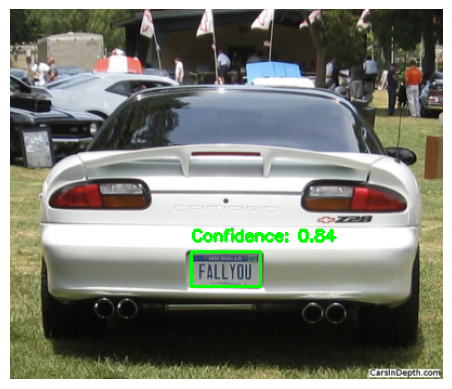

In [31]:
predict_plot(r"C:\Users\nolan\cse574proj\data\images\Cars319.png", model_12)

In [32]:
import pytesseract

# Set the full path to the tesseract executable
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [33]:
def detect_and_extract_text(image_path, model):
    img = cv2.imread(image_path)
    results = model.predict(image_path, device='cuda')
    extracted_texts = []

    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            roi = img[y1:y2, x1:x2]

            if roi.shape[0] < 10 or roi.shape[1] < 10:
                continue

            gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
            gray = cv2.medianBlur(gray, 3)
            thresh = cv2.adaptiveThreshold(
                gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                cv2.THRESH_BINARY, 11, 2
            )

            config = '--psm 11 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
            text = pytesseract.image_to_string(thresh, config=config)
            extracted_texts.append(text.strip())

    return extracted_texts

In [34]:
results = model_12.predict(r"C:\Users\nolan\cse574proj\data\images\Cars61.png", device='cuda')


image 1/1 C:\Users\nolan\cse574proj\data\images\Cars61.png: 256x320 1 license_plate, 55.5ms
Speed: 1.1ms preprocess, 55.5ms inference, 1.7ms postprocess per image at shape (1, 3, 256, 320)


In [35]:
import cv2
import pytesseract
import pandas as pd

# Optional: Set Tesseract executable path if needed (for Windows)
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

def extract_text_from_roi(image_path, xmin, xmax, ymin, ymax):
    img = cv2.imread(image_path)

    if img is None:
        return ""  # In case the image path is invalid

    roi = img[ymin:ymax, xmin:xmax]

    if roi.shape[0] < 10 or roi.shape[1] < 10:
        return ""

    # Convert to grayscale
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

    # Apply adaptive thresholding
    thresh = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY, 11, 2
    )

    # OCR config
    config = '--psm 11 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'

    # OCR
    text = pytesseract.image_to_string(thresh, config=config)

    return text.strip()

# Assuming 'test' is your DataFrame
texts = []
test2 = test.copy()

for index, row in test2.iterrows():
    text = extract_text_from_roi(
        row['img_path'],
        int(row['xmin']),
        int(row['xmax']),
        int(row['ymin']),
        int(row['ymax'])
    )
    texts.append(text)

# Add text column
test2['text'] = texts


In [41]:
import cv2
import pytesseract
import pandas as pd
import re

# Optional: Set Tesseract executable path if needed (for Windows)
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

def extract_text_from_roi(image_path, xmin, xmax, ymin, ymax):
    img = cv2.imread(image_path)

    if img is None:
        print(f"⚠️ Failed to load image: {image_path}")
        return ""

    h, w = img.shape[:2]

    # Clamp coordinates to image bounds
    xmin, xmax = max(0, xmin), min(w, xmax)
    ymin, ymax = max(0, ymin), min(h, ymax)

    if xmax <= xmin or ymax <= ymin:
        print(f"⚠️ Invalid bounding box: {(xmin, xmax, ymin, ymax)}")
        return ""

    roi = img[ymin:ymax, xmin:xmax]

    if roi is None or roi.size == 0 or roi.shape[0] < 10 or roi.shape[1] < 10:
        print(f"⚠️ Skipping empty/too-small ROI at {image_path}")
        return ""

    # Convert to grayscale
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

    # Resize (double size)
    gray = cv2.resize(gray, (gray.shape[1]*2, gray.shape[0]*2), interpolation=cv2.INTER_CUBIC)

    # Apply adaptive thresholding
    thresh = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY, 11, 2
    )

    # OCR config
    config = '--psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'

    # OCR
    text = pytesseract.image_to_string(thresh, config=config)

    return text.strip()

def extract_text_from_predicted_roi(image_path, model=model_12):
    results = model.predict(image_path, device='cuda')
    result = results[0]
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Check if any boxes were detected
    if not hasattr(result, 'boxes') or result.boxes is None or len(result.boxes) == 0:
        print(f"⚠️ No license plate detected in {image_path}")
        return ""

    box = result.boxes[0]  # Just get the first (and only) box
    xmin, ymin, xmax, ymax = map(int, box.xyxy[0])

# Now you can crop or run OCR
    roi = image[ymin:ymax, xmin:xmax]

    if img is None:
        print(f"⚠️ Failed to load image: {image_path}")
        return ""

    # Convert to grayscale
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

    # Resize (double size)
    gray = cv2.resize(gray, (gray.shape[1]*2, gray.shape[0]*2), interpolation=cv2.INTER_CUBIC)

    # Apply adaptive thresholding
    thresh = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY, 11, 2
    )

    # OCR config
    config = '--psm 11 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'

    # OCR
    text = pytesseract.image_to_string(thresh, config=config)

    return text.strip()

# Assuming 'test' is your DataFrame with correct columns
texts = []
pred_texts = []
test2 = test.copy()

for _, row in test2.iterrows():
    text = extract_text_from_roi(
        row['img_path'],
        int(row['xmin']),
        int(row['xmax']),
        int(row['ymin']),
        int(row['ymax'])
    )
    pred_text = extract_text_from_predicted_roi(row['img_path'], model_12)
    texts.append(re.sub(r'\s+', '', text))
    pred_texts.append(re.sub(r'\s+', '', pred_text))

# Add the extracted text column to the dataframe
test2['text'] = texts
test2['pred_text'] = pred_texts


image 1/1 C:\Users\nolan\cse574proj\data\images\Cars90.png: 256x320 2 license_plates, 100.3ms
Speed: 1.3ms preprocess, 100.3ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 320)

image 1/1 C:\Users\nolan\cse574proj\data\images\Cars309.png: 192x320 1 license_plate, 15.8ms
Speed: 0.6ms preprocess, 15.8ms inference, 1.6ms postprocess per image at shape (1, 3, 192, 320)

image 1/1 C:\Users\nolan\cse574proj\data\images\Cars247.png: 192x320 1 license_plate, 16.1ms
Speed: 0.8ms preprocess, 16.1ms inference, 1.7ms postprocess per image at shape (1, 3, 192, 320)

image 1/1 C:\Users\nolan\cse574proj\data\images\Cars124.png: 224x320 2 license_plates, 19.0ms
Speed: 0.6ms preprocess, 19.0ms inference, 2.1ms postprocess per image at shape (1, 3, 224, 320)

image 1/1 C:\Users\nolan\cse574proj\data\images\Cars59.png: 256x320 1 license_plate, 14.6ms
Speed: 0.6ms preprocess, 14.6ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 320)

image 1/1 C:\Users\nolan\cse574proj\data\i

In [42]:
test2

,img_path,xmin,xmax,ymin,ymax,img_w,img_h,text,pred_text
423,C:\Users\nolan\cse574proj\data\images\Cars90.png,77,101,204,225,400,300,,
234,C:\Users\nolan\cse574proj\data\images\Cars309.png,152,252,122,207,400,225,,Q
165,C:\Users\nolan\cse574proj\data\images\Cars247.png,147,300,11,149,400,225,CEA,365ZVACIS
29,C:\Users\nolan\cse574proj\data\images\Cars124.png,305,320,256,267,400,267,9,
388,C:\Users\nolan\cse574proj\data\images\Cars59.png,324,375,162,175,400,300,2GP,WM
424,C:\Users\nolan\cse574proj\data\images\Cars91.png,269,317,170,189,400,253,SOLU,AMO
361,C:\Users\nolan\cse574proj\data\images\Cars423.png,162,283,159,183,400,250,LP3RVP,TRARDIPIRVP
0,C:\Users\nolan\cse574proj\data\images\Cars0.png,226,419,125,173,500,268,,SF2550
79,C:\Users\nolan\cse574proj\data\images\Cars17.png,306,351,188,205,400,267,,
114,C:\Users\nolan\cse574proj\data\images\Cars200.png,95,195,189,217,400,246,MNLO3TABIES380,KAYABMS380


In [ ]:
truth = [
    '',
    'EAB0001',
    'TN37C52765',
    '',
    'MH45P1651',
    '30461C',
    'P3RVP',
    'KLO1CA2555',
    'YSX213',
    'KA03AB3380',
    'MH0BB5992',
    'BJR216',
    '0X65AWD',
    'PZ62FDZ',
    'MH15BD8877',
    'KL01CC50',
    'KA09MA2662',
    'PRIVATE',
    'ML60LXB',
    'TN02BL9',
    'MANISA',
    'KA03MR32',
    '695299',
    'FALLYOU',
    'JPK6546',
    'D13',
    'CH01AN0001',
    'DL8CX4850',
    'RP66887',
    'MMN306',
    'FV1232',
    '007PLATE.COM',
    'KA03MG2784',
    'LAWYER',
    '',
    'CZI7KOD',
    'AFR2011',
    'DL7CN5617',
    'PEN15',
    'AP29BP585',
    'BYHM136',
    'HR26CE1485',
    '889VSM',
    'AK0188'
]

In [ ]:
test2['truth'] = truth

In [ ]:
test2

,img_path,xmin,xmax,ymin,ymax,img_w,img_h,text,pred_text,truth
423,C:\Users\nolan\cse574proj\data\images\Cars90.png,77,101,204,225,400,300,,1NHOPNSA,
234,C:\Users\nolan\cse574proj\data\images\Cars309.png,152,252,122,207,400,225,,RSPSNPYEAN,EAB0001
165,C:\Users\nolan\cse574proj\data\images\Cars247.png,147,300,11,149,400,225,CEA,PSHH,TN37C52765
29,C:\Users\nolan\cse574proj\data\images\Cars124.png,305,320,256,267,400,267,9,UHANSIIRET,
388,C:\Users\nolan\cse574proj\data\images\Cars59.png,324,375,162,175,400,300,2GP,EOE4E3,MH45P1651
424,C:\Users\nolan\cse574proj\data\images\Cars91.png,269,317,170,189,400,253,SOLU,SL,30461C
361,C:\Users\nolan\cse574proj\data\images\Cars423.png,162,283,159,183,400,250,LP3RVP,VPHI,P3RVP
0,C:\Users\nolan\cse574proj\data\images\Cars0.png,226,419,125,173,500,268,,K2055,KLO1CA2555
79,C:\Users\nolan\cse574proj\data\images\Cars17.png,306,351,188,205,400,267,,J4OEOS,YSX213
114,C:\Users\nolan\cse574proj\data\images\Cars200.png,95,195,189,217,400,246,MNLO3TABIES380,FEHS,KA03AB3380


In [ ]:
from jiwer import cer

df = test2.copy()
df = df.dropna(subset=['text', 'pred_text', 'truth'])

df = df[
    (df['text'].str.strip() != '') &
    (df['pred_text'].str.strip() != '') &
    (df['truth'].str.strip() != '')
]

text_predtext_cer = []
text_truth_cer = []
predtext_truth_cer = []
for _, row in df.iterrows():
    text_predtext = cer(row['text'], row['pred_text'])
    text_predtext_cer.append(text_predtext)

    text_truth = cer(row['truth'], row['text'])
    text_truth_cer.append(text_truth)

    predtext_truth = cer(row['truth'], row['pred_text'])
    predtext_truth_cer.append(predtext_truth)

df['text_predtext_wer'] = text_predtext_cer
df['text_truth_wer'] = text_truth_cer
df['predtext_truth_wer'] = predtext_truth_cer

df

,img_path,xmin,xmax,ymin,ymax,img_w,img_h,text,pred_text,truth,text_predtext_wer,text_truth_wer,predtext_truth_wer
165,C:\Users\nolan\cse574proj\data\images\Cars247.png,147,300,11,149,400,225,CEA,PSHH,TN37C52765,1.333333,0.900000,1.000000
388,C:\Users\nolan\cse574proj\data\images\Cars59.png,324,375,162,175,400,300,2GP,EOE4E3,MH45P1651,2.000000,0.888889,1.000000
424,C:\Users\nolan\cse574proj\data\images\Cars91.png,269,317,170,189,400,253,SOLU,SL,30461C,0.500000,1.000000,1.000000
361,C:\Users\nolan\cse574proj\data\images\Cars423.png,162,283,159,183,400,250,LP3RVP,VPHI,P3RVP,0.833333,0.200000,1.000000
114,C:\Users\nolan\cse574proj\data\images\Cars200.png,95,195,189,217,400,246,MNLO3TABIES380,FEHS,KA03AB3380,0.928571,0.800000,1.000000
288,C:\Users\nolan\cse574proj\data\images\Cars358.png,44,107,94,107,400,200,PZ62FDX,SSSOE,PZ62FDZ,1.000000,0.142857,1.000000
323,C:\Users\nolan\cse574proj\data\images\Cars39.png,225,328,180,213,400,300,HH15BD8877,RSSSE,MH15BD8877,1.000000,0.100000,1.000000
432,C:\Users\nolan\cse574proj\data\images\Cars99.png,70,262,198,271,375,500,2668,FEYSASSASSS,KA09MA2662,2.750000,0.700000,1.100000
7,C:\Users\nolan\cse574proj\data\images\Cars104.png,195,244,266,282,500,374,ARUGOLXB,SSSANYSAYBAYEEKF,ML60LXB,1.875000,0.714286,2.142857
27,C:\Users\nolan\cse574proj\data\images\Cars122.png,195,254,147,169,400,300,HANISA,ROW,MANISA,1.000000,0.166667,1.000000


In [ ]:
cer('MANISA', 'HANISA')

0.16666666666666666